## Introduction to tensorflow a million

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook
np.random.seed(42)
import pandas as pd

In [2]:
xs=np.linspace(0.0,8.0,8000000)
ys=0.3*xs-0.8+np.random.normal(scale=0.25,size=len(xs))

<IPython.core.display.Javascript object>


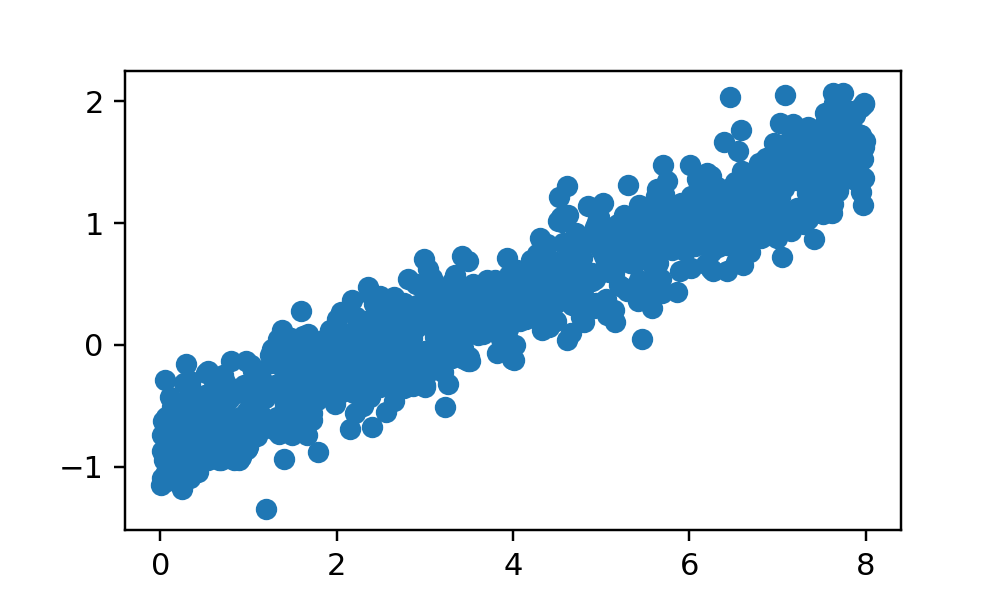

In [3]:
fig, ax = plt.subplots()
df_subset=pd.DataFrame(list(zip(xs,ys)),columns=['x','y']).sample(1000)

_ = ax.scatter(df_subset.x, df_subset.y)

In [4]:
m=tf.Variable(-0.8)
c=tf.Variable(8.0)


#since size is 8 million we now do stochastic gradient descent
batch_size=16
xs_placeholder=tf.placeholder(tf.float32,(batch_size))
ys_placeholder=tf.placeholder(tf.float32,(batch_size))


In [5]:
y_model=m*xs_placeholder+c
#optimizing the mean squared error loss
total_error=tf.reduce_sum((ys_placeholder-y_model)**2)
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 
initializer_operation=tf.global_variables_initializer()

### Building sampling and stochastic gradient descent     

In [6]:
with tf.Session() as session:
    session.run(initializer_operation)
    n_batches=1000
    for i in range(n_batches):
        random_indices=np.random.randint(len(xs),size=batch_size)
        feed={xs_placeholder:xs[random_indices],ys_placeholder:ys[random_indices]}
        session.run(optimizer_operation,feed_dict=feed)
    slope,intercept=session.run([m, c])
        

In [7]:
print(slope,intercept)

0.30727863 -0.78833437
